# Novartis Data science challenge :

To predict whether the server is hacked or not.

# Approach That I took:

1. Initially I tried using Binary Classification using keras but in that case The score was almost 55
2. After that I tried out Decision Tree Classifier, Gradient Boosting Classification & Adaboost Classification. From these cases I saw that GBC is working best so I tried that out and got a score of 99.48
3. After some fine tuning in GBC I got the score of 99.52 and after that whatever I do, It was not improving
4. I tried out AutoMl after that. It took almost 8 Hours to train and got a score of 99.58
5. After that I came to know about Catboost classification so tried that out and boom!! I got a score of 99.99! But in this case even after finetuning the score was not improving
6. As the score was not improving I went to the EDA section again and figured out that 'X_7', 'X_9', 'X_12' & 'X_14' are reducing the accuracy. So after removing those and Training on CBC I got the score of 100.00

In [1]:
#import basic libraries
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

# Basic EDA

In [2]:
#loading the train data
train = pd.read_csv("../input/novartis-data/Train.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23674 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

In [4]:
#loading the test data
test = pd.read_csv("../input/novartis-data/Test.csv")

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INCIDENT_ID  15903 non-null  object 
 1   DATE         15903 non-null  object 
 2   X_1          15903 non-null  int64  
 3   X_2          15903 non-null  int64  
 4   X_3          15903 non-null  int64  
 5   X_4          15903 non-null  int64  
 6   X_5          15903 non-null  int64  
 7   X_6          15903 non-null  int64  
 8   X_7          15903 non-null  int64  
 9   X_8          15903 non-null  int64  
 10  X_9          15903 non-null  int64  
 11  X_10         15903 non-null  int64  
 12  X_11         15903 non-null  int64  
 13  X_12         15776 non-null  float64
 14  X_13         15903 non-null  int64  
 15  X_14         15903 non-null  int64  
 16  X_15         15903 non-null  int64  
dtypes: float64(1), int64(14), object(2)
memory usage: 2.1+ MB


In [6]:
#Dropping the Incident_ID and Date from train data
train = train.drop(['INCIDENT_ID','DATE'], axis=1)

In [7]:
#Verifying all the columns that has the null values in train data
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

X_12    182
dtype: int64

In [8]:
#Filled NaN values with "0" using fillna()
train["X_12"].fillna(0,inplace = True)

In [9]:
#Verifying all the columns that has the null values in test data
null_columns=test.columns[test.isnull().any()]
test[null_columns].isnull().sum()

X_12    127
dtype: int64

In [10]:
#Filled NaN values with "0" using fillna()
test["X_12"].fillna(0,inplace = True)
test.isnull().sum()

INCIDENT_ID    0
DATE           0
X_1            0
X_2            0
X_3            0
X_4            0
X_5            0
X_6            0
X_7            0
X_8            0
X_9            0
X_10           0
X_11           0
X_12           0
X_13           0
X_14           0
X_15           0
dtype: int64

We can view in the train and test info that X_12 is float64 let's convert it into int64

In [11]:
train["X_12"] = train["X_12"].astype(np.int64)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   X_1               23856 non-null  int64
 1   X_2               23856 non-null  int64
 2   X_3               23856 non-null  int64
 3   X_4               23856 non-null  int64
 4   X_5               23856 non-null  int64
 5   X_6               23856 non-null  int64
 6   X_7               23856 non-null  int64
 7   X_8               23856 non-null  int64
 8   X_9               23856 non-null  int64
 9   X_10              23856 non-null  int64
 10  X_11              23856 non-null  int64
 11  X_12              23856 non-null  int64
 12  X_13              23856 non-null  int64
 13  X_14              23856 non-null  int64
 14  X_15              23856 non-null  int64
 15  MULTIPLE_OFFENSE  23856 non-null  int64
dtypes: int64(16)
memory usage: 2.9 MB


In [12]:
test["X_12"] = test["X_12"].astype(np.int64)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   INCIDENT_ID  15903 non-null  object
 1   DATE         15903 non-null  object
 2   X_1          15903 non-null  int64 
 3   X_2          15903 non-null  int64 
 4   X_3          15903 non-null  int64 
 5   X_4          15903 non-null  int64 
 6   X_5          15903 non-null  int64 
 7   X_6          15903 non-null  int64 
 8   X_7          15903 non-null  int64 
 9   X_8          15903 non-null  int64 
 10  X_9          15903 non-null  int64 
 11  X_10         15903 non-null  int64 
 12  X_11         15903 non-null  int64 
 13  X_12         15903 non-null  int64 
 14  X_13         15903 non-null  int64 
 15  X_14         15903 non-null  int64 
 16  X_15         15903 non-null  int64 
dtypes: int64(15), object(2)
memory usage: 2.1+ MB


In [13]:
#Removing the duplicated rows from train data
print("Shape of train before removing the duplicates :" , train.shape)
train.drop_duplicates(keep='first', inplace=True)
print("Shape of train After removing the duplicates :" , train.shape)

Shape of train before removing the duplicates : (23856, 16)
Shape of train After removing the duplicates : (18781, 16)


In [14]:
#Skewness of the train data
train.skew()

X_1                  3.651007
X_2                 -0.004833
X_3                 -0.004439
X_4                  0.063801
X_5                  0.055655
X_6                  0.986797
X_7                  0.866613
X_8                 17.272061
X_9                 -1.399578
X_10                31.606144
X_11                -0.872144
X_12                29.016244
X_13                -1.244572
X_14                 0.166869
X_15                -2.629338
MULTIPLE_OFFENSE    -4.032494
dtype: float64

# Data Analysis on Train data :

### Checking Skewness & Kurtosis:

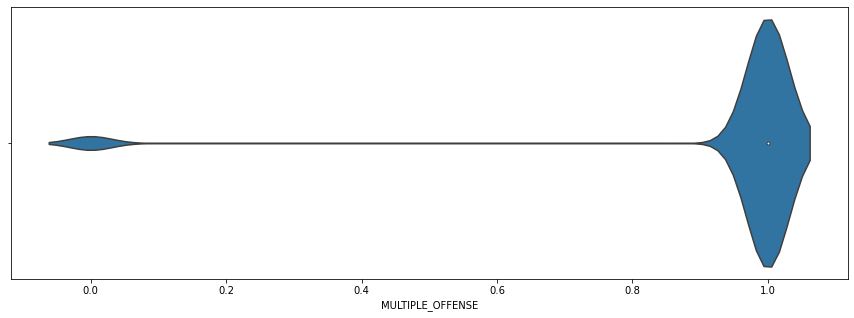

Skewness: -4.032494075008757
Kurtosis: 14.262527278767362


In [15]:
f,ax = plt.subplots(1,1,figsize=(15,5))
sns.violinplot(train['MULTIPLE_OFFENSE'])
plt.show()
#skewness and kurtosis
print("Skewness: {}".format(train['MULTIPLE_OFFENSE'].skew()))
print("Kurtosis: {}".format(train['MULTIPLE_OFFENSE'].kurt()))

### Histogram Plot:

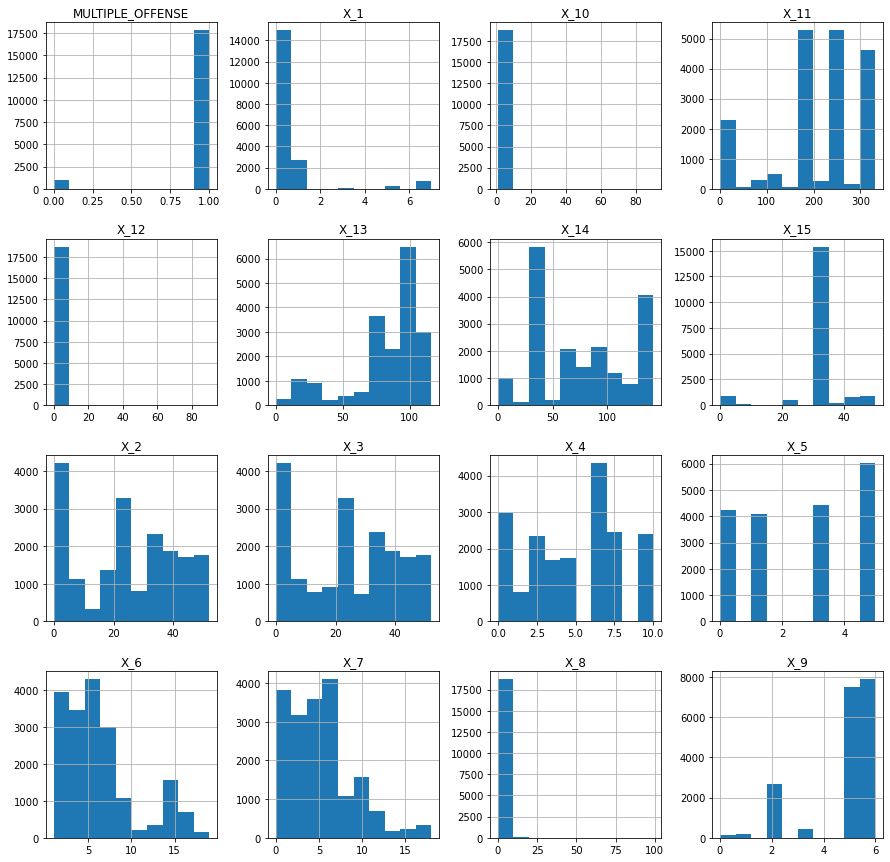

In [16]:
train.hist(figsize=(15,15))
plt.show()

### Pair Plot:

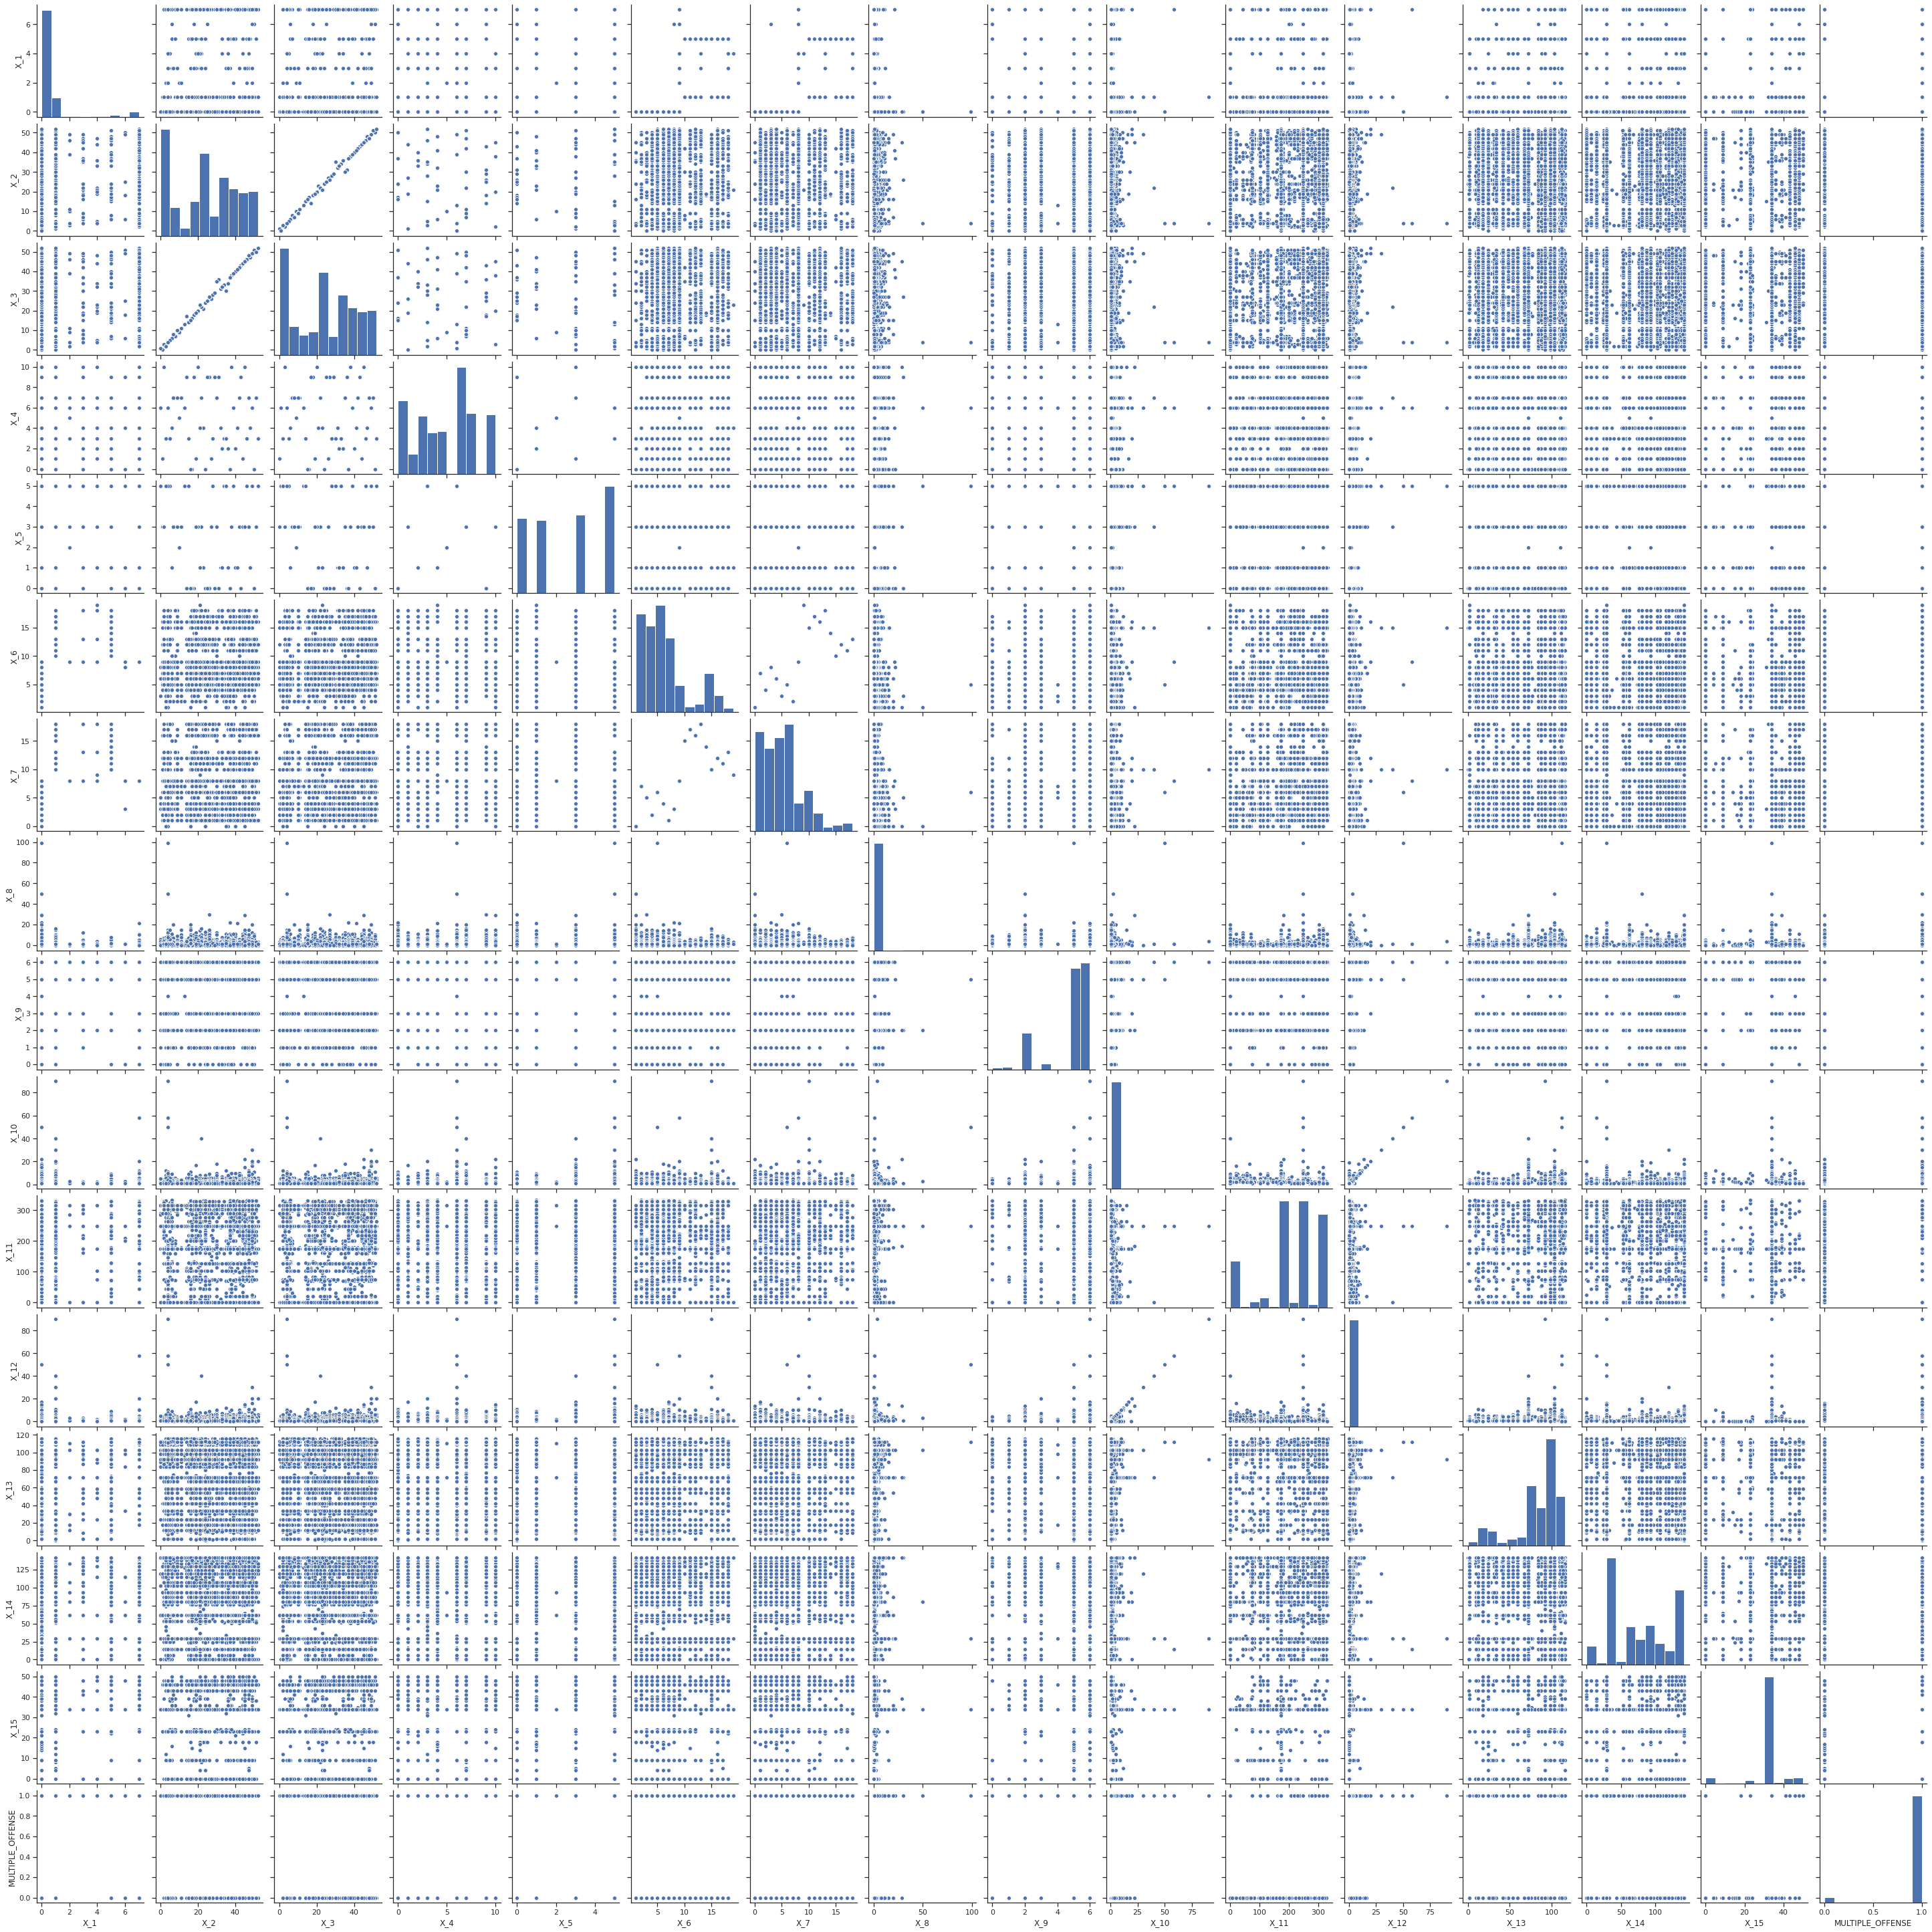

In [17]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(train)
plt.show()

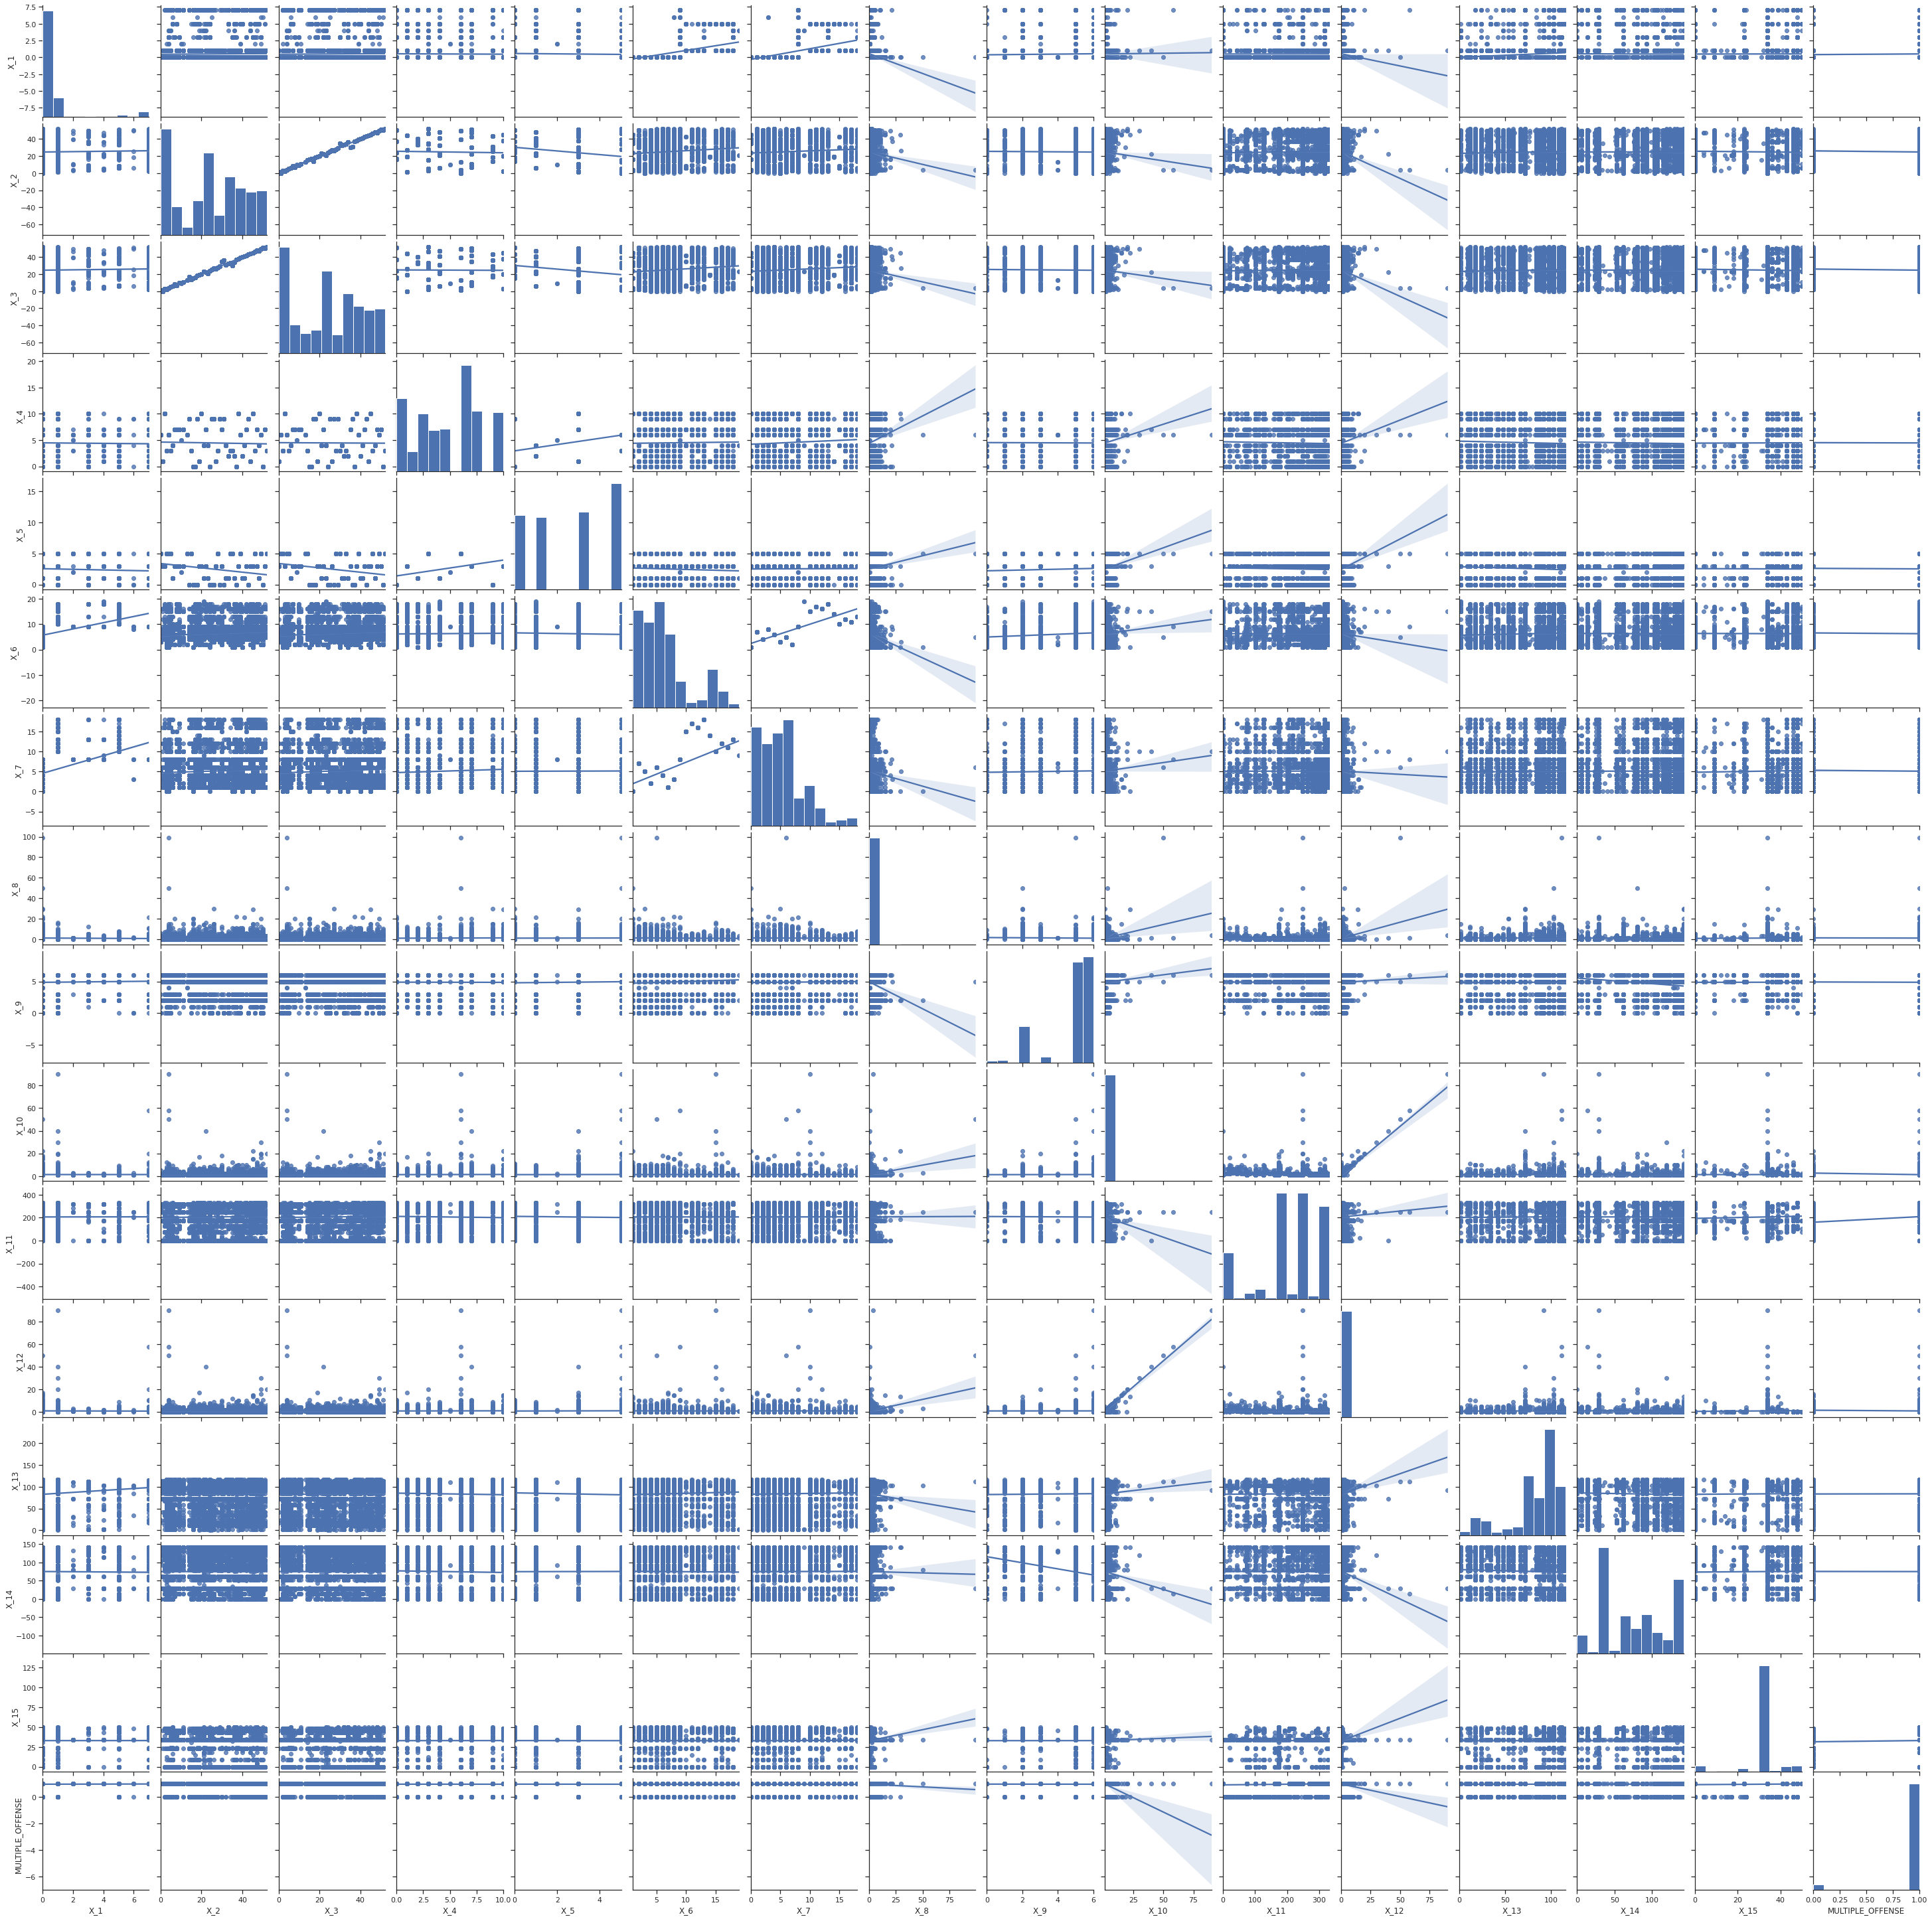

In [18]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(train,kind="reg")
plt.show()

### Heatmap

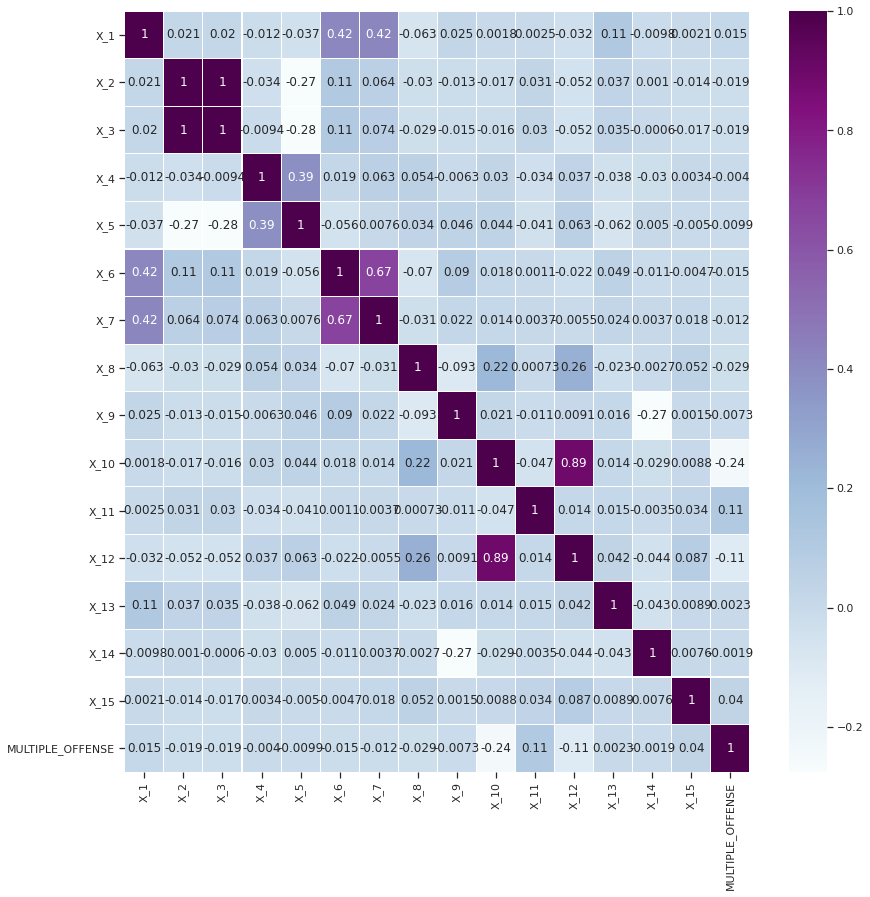

In [19]:
sns.heatmap(train.corr(),annot=True, cmap='BuPu', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(14,14)
plt.show()

In [20]:
print("Number of training Mutiple Offence : {} ".format(len(train)))
print("Offense Rate {:.4}%".format(train["MULTIPLE_OFFENSE"].mean()*100))

Number of training Mutiple Offence : 18781 
Offense Rate 94.79%


### Let's visualize the Multiple Offense rate using pie chart

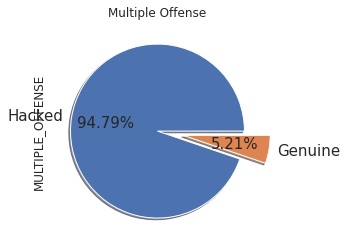

In [21]:
#Creating Pie Chart for the target variable
labels = ['Hacked', 'Genuine']
plt.title('Multiple Offense')
train['MULTIPLE_OFFENSE'].value_counts().plot.pie(explode=[0,0.3],autopct='%1.2f%%',shadow=True,labels=labels,fontsize=15)

# Data Analysis on Test

### Histogram Plot:

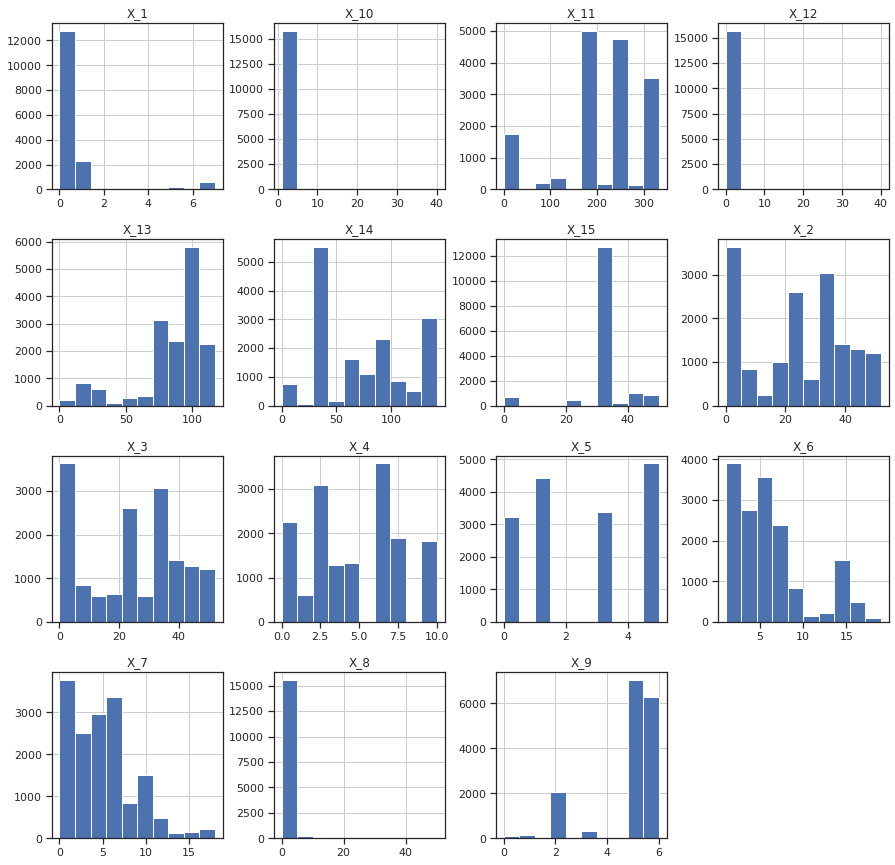

In [22]:
test.hist(figsize=(15,15))
plt.show()

### Pair Plot:

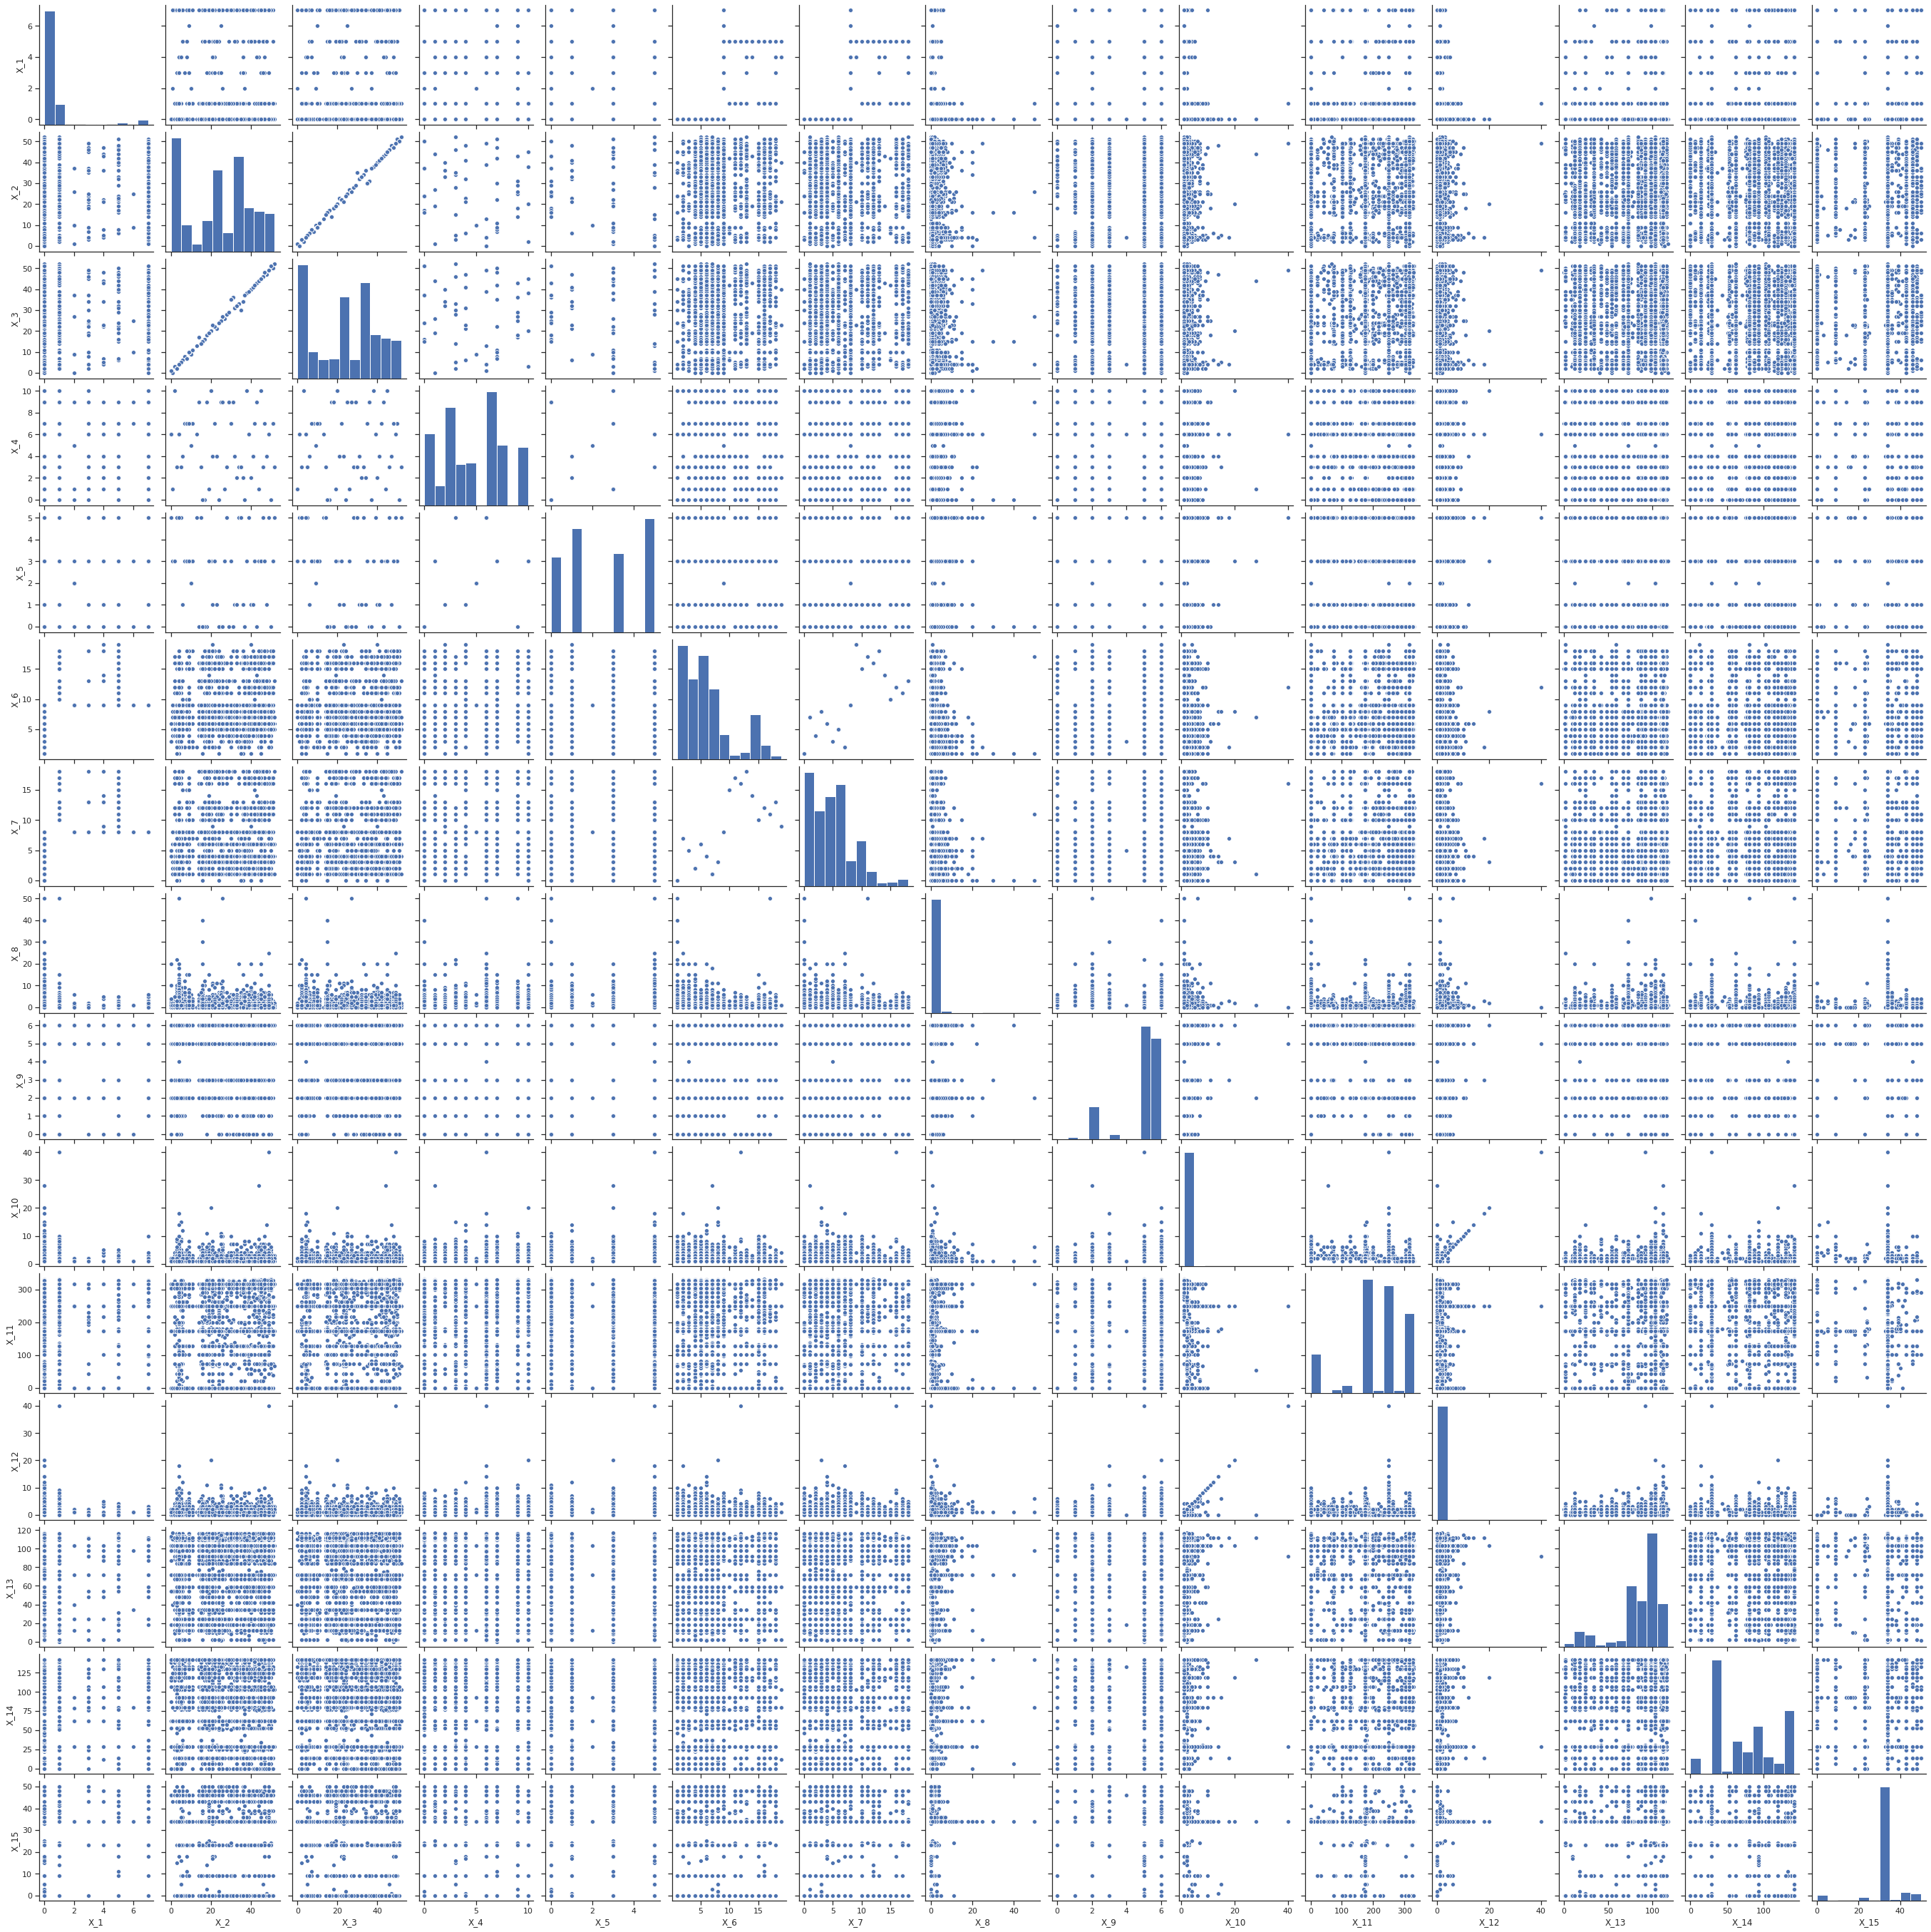

In [23]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(test)
plt.show()

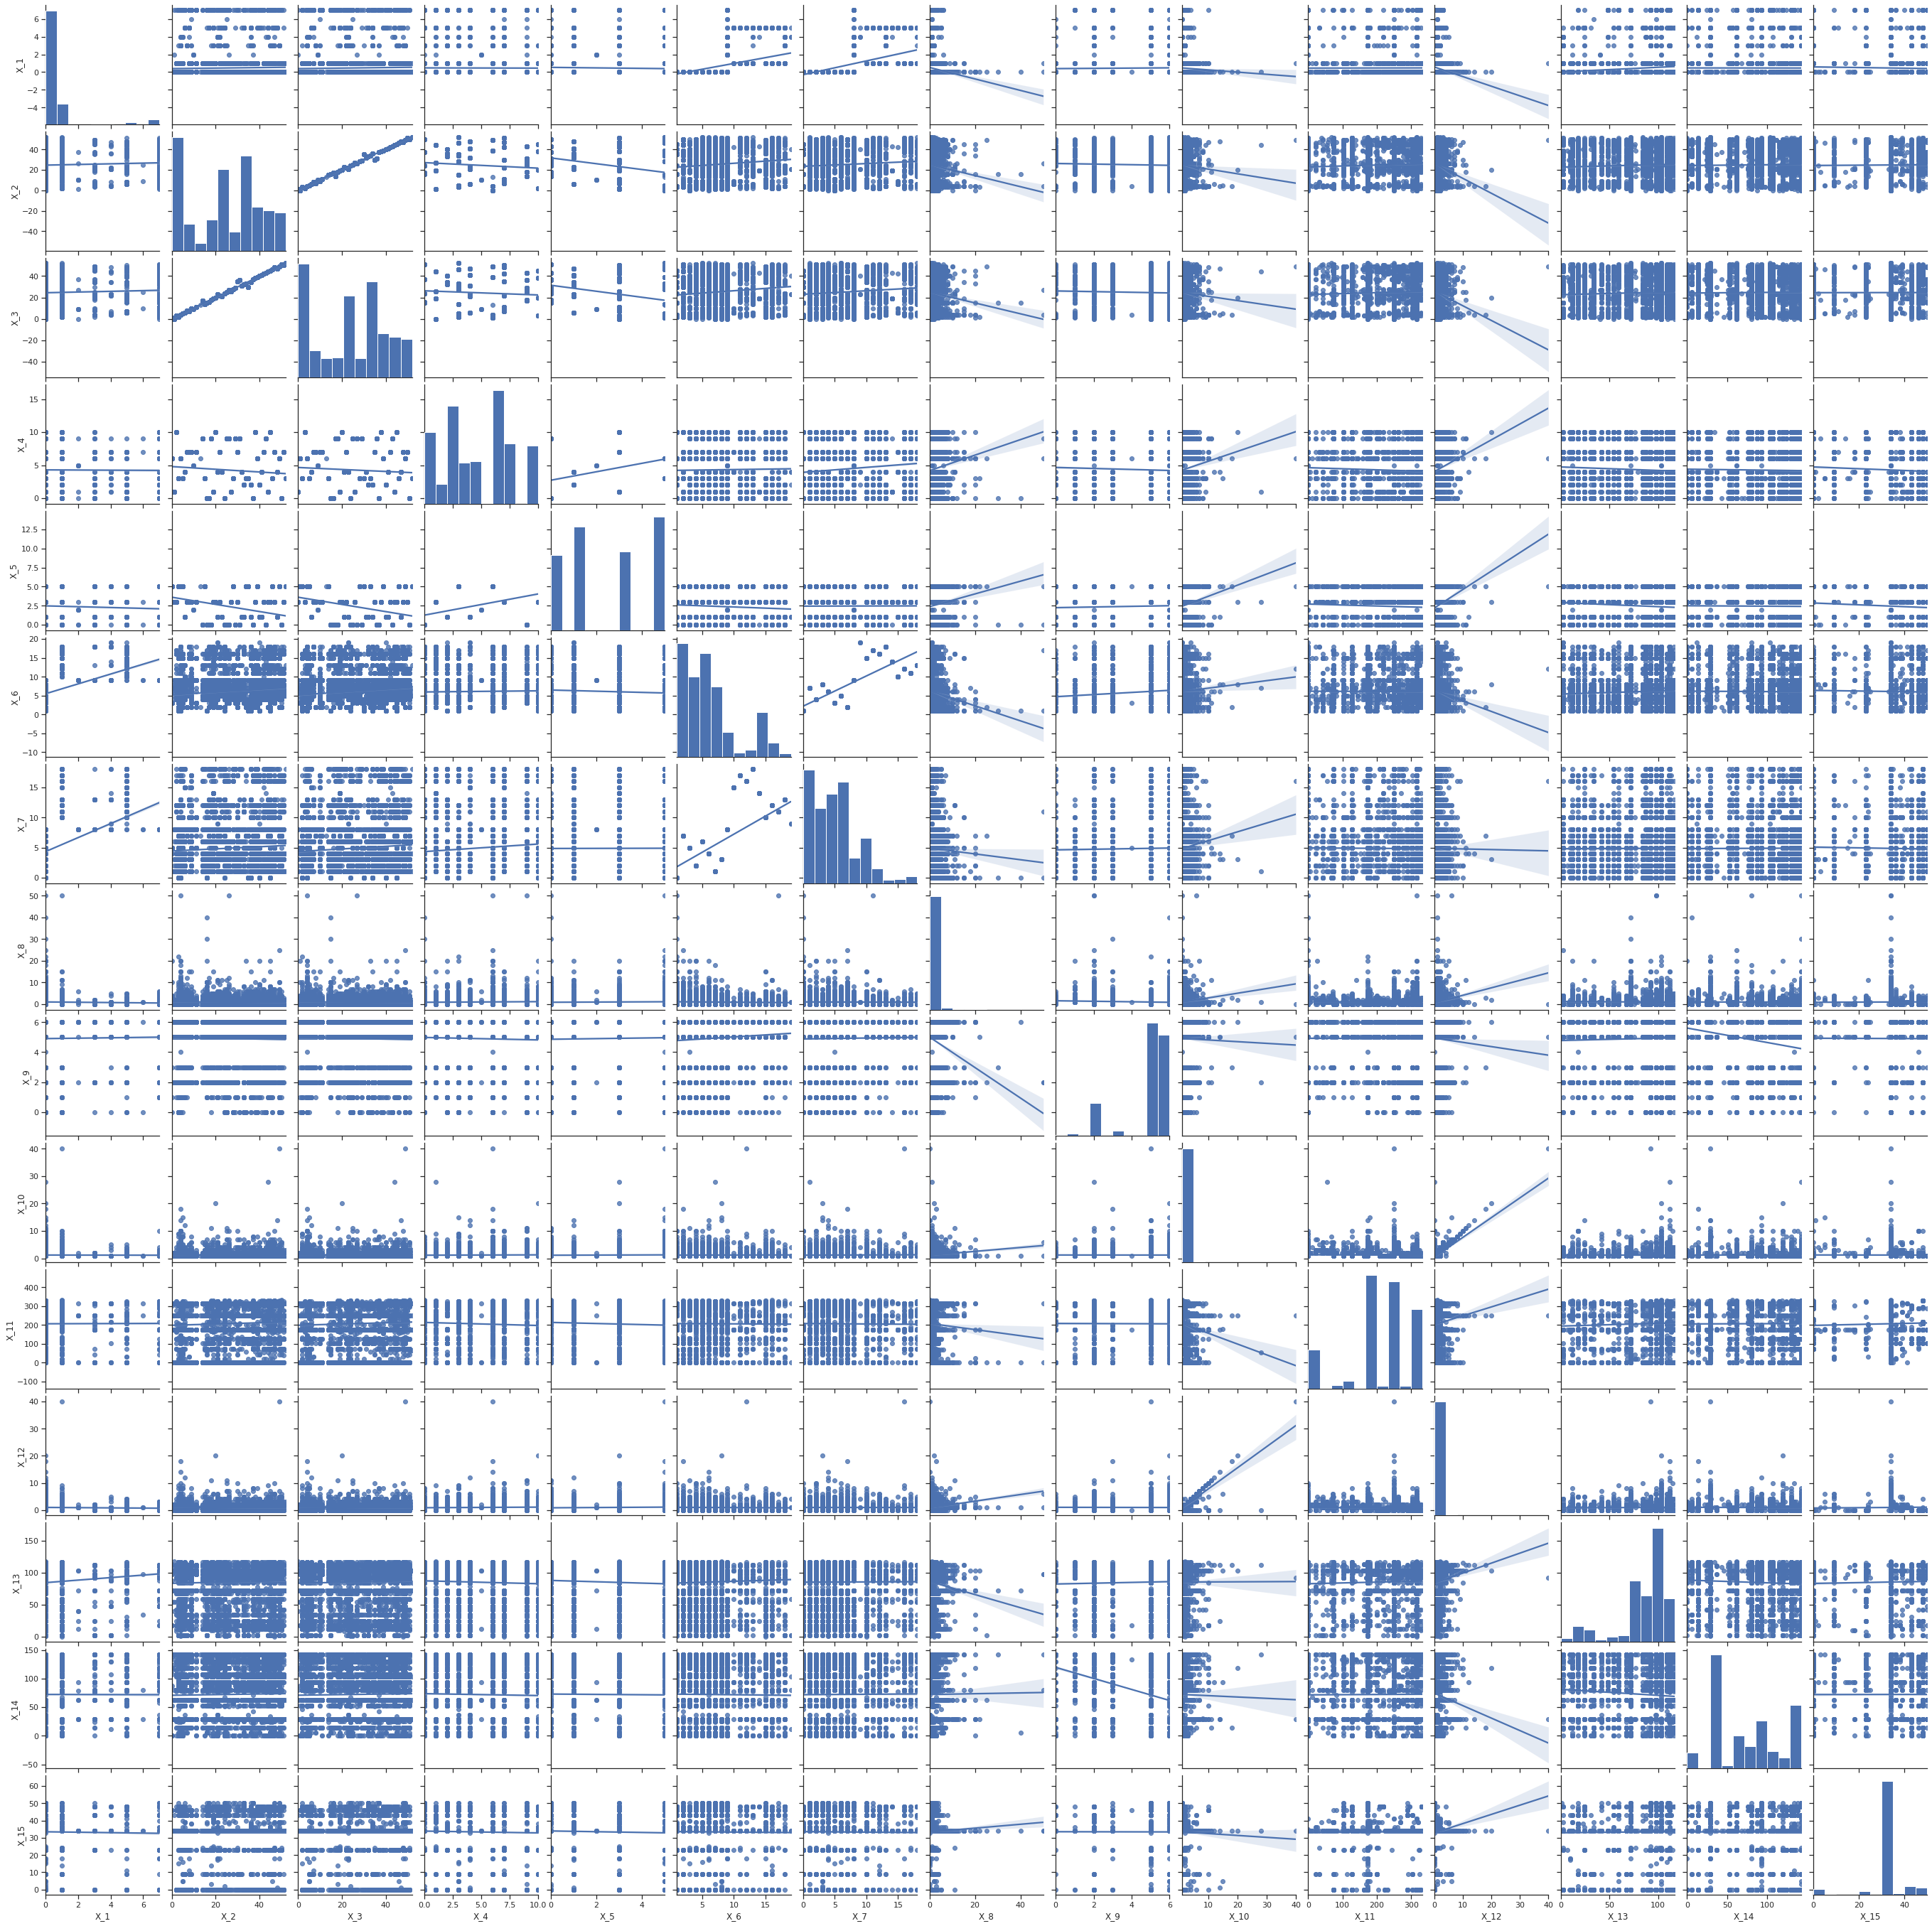

In [24]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(test,kind="reg")
plt.show()

# DATA PROCESSING FOR PREDICTION :

From the above plots we can see that 'X_7', 'X_9', 'X_12' & 'X_14' will reduce the acuracy. So let's drop those columns

In [25]:
train=train.drop(['X_7','X_9','X_12','X_14'], axis=1)
test=test.drop(['X_7','X_9','X_12','X_14'], axis=1)

In [26]:
X_train = train.iloc[:,:-1]
y_train = train["MULTIPLE_OFFENSE"]
#Dropping the Incident_ID and Date from test data
X_test = test.drop(['INCIDENT_ID','DATE'], axis=1)

In [27]:
print("Shape of X_train : ",X_train.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of X_test : ",X_test.shape)

Shape of X_train :  (18781, 11)
Shape of y_train :  (18781,)
Shape of X_test :  (15903, 11)


# SMOTE:


SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input. This implementation of SMOTE does not change the number of majority cases.                              

To read further about SMOTE: [Link](https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/smote) 


In [28]:
print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {} \n'.format(y_train.shape))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, the shape of X_train: (18781, 11)
Before OverSampling, the shape of y_train: (18781,) 

Before OverSampling, counts of label '1': 17803
Before OverSampling, counts of label '0': 978 



In [29]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm = sampler.fit_sample(X_train, y_train)
print('After OverSampling, the shape of X_train: {}'.format(X_train_sm.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_sm.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm==0)))

Using TensorFlow backend.


After OverSampling, the shape of X_train: (35606, 11)
After OverSampling, the shape of y_train: (35606,) 

After OverSampling, counts of label '1': 17803
After OverSampling, counts of label '0': 17803


In the above output we can cleary see that the target variable is well balanced.

In [30]:
#Spltting the data into train and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_sm, y_train_sm ,test_size=0.3, random_state=100)

In [31]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss  = ss.transform(X_test)
X_val_ss   = ss.transform(X_val)

# DATA MODELLING FOR PREDICTION :

## DecisionTree

In [32]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

decisiontree = DecisionTreeClassifier(random_state=0)
decisiontree.fit(X_train_ss, y_train)

y_pred = decisiontree.predict(X_val_ss)

acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
recall_decisiontree = recall_score(y_pred, y_val)

print("Decision Tree Accuracy Score:",acc_decisiontree)
print('Decision Tree Recall Score:',recall_decisiontree)

Decision Tree Accuracy Score: 99.7
Decision Tree Recall Score: 0.9977670264235207


In [33]:
from sklearn.model_selection import cross_val_score

cross_val_score(decisiontree, X_train_ss, y_train, cv=10)

array([0.99598877, 0.99799438, 0.99638989, 0.99598877, 0.99719101,
       0.99799358, 0.9975923 , 0.99518459, 0.9975923 , 0.99839486])

## GradientBoosting

In [34]:
#Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

gbc = GradientBoostingClassifier(n_estimators=1000,learning_rate=1.0, random_state=100)
gbc.fit(X_train_ss, y_train)

y_pred = gbc.predict(X_val_ss)

acc_gbc = round(accuracy_score(y_pred, y_val) * 100, 2)
recall_gbc = recall_score(y_pred, y_val)

print("Gradient Boosting Classifier Accuracy Score:",acc_gbc)
print("Gradient Boosting Classifier Recall Score:",recall_gbc)

Gradient Boosting Classifier Accuracy Score: 99.47
Gradient Boosting Classifier Recall Score: 0.9940619781035442


In [35]:
from sklearn.model_selection import cross_val_score

CV = cross_val_score(gbc, X_train_ss, y_train, cv=5)
print(CV.mean())

0.9965094480874406


## AdaBoost

In [36]:
#AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

abc = AdaBoostClassifier(n_estimators=1000, random_state=1000,learning_rate=0.3)
abc.fit(X_train_ss, y_train)

y_pred = abc.predict(X_val_ss)

acc_abc = round(accuracy_score(y_pred, y_val) * 100, 2)
recall_abc = recall_score(y_pred, y_val)

print("AdaBoost Classifier Accuracy Score:",acc_abc)
print("AdaBoost Classifier Recall Score:",recall_abc)

AdaBoost Classifier Accuracy Score: 99.55
AdaBoost Classifier Recall Score: 0.997018263138278


## CatBoost

In [37]:
cat_features = list(range(0, X_train_sm.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [38]:
# Catboost Classifier

#Just to check if the model is working on the data properly or not

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_sm, y_train_sm, test_size=0.05, random_state=42)

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)

clf.fit(X_train, y_train, 
        cat_features=cat_features, 
        eval_set=(X_val, y_val), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


In [39]:
#Model Training

clf = CatBoostClassifier(
    iterations=1000,
    random_seed=42,
    depth=10,
    learning_rate=0.1,
    model_size_reg=0
)

clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_val, y_val),
)


0:	learn: 0.4076092	test: 0.4012397	best: 0.4012397 (0)	total: 231ms	remaining: 3m 51s
1:	learn: 0.2399155	test: 0.2315731	best: 0.2315731 (1)	total: 434ms	remaining: 3m 36s
2:	learn: 0.1399495	test: 0.1333459	best: 0.1333459 (2)	total: 630ms	remaining: 3m 29s
3:	learn: 0.0870309	test: 0.0823213	best: 0.0823213 (3)	total: 817ms	remaining: 3m 23s
4:	learn: 0.0552020	test: 0.0513710	best: 0.0513710 (4)	total: 1s	remaining: 3m 19s
5:	learn: 0.0378638	test: 0.0347938	best: 0.0347938 (5)	total: 1.2s	remaining: 3m 18s
6:	learn: 0.0270232	test: 0.0240814	best: 0.0240814 (6)	total: 1.4s	remaining: 3m 18s
7:	learn: 0.0207532	test: 0.0181197	best: 0.0181197 (7)	total: 1.57s	remaining: 3m 14s
8:	learn: 0.0164665	test: 0.0139411	best: 0.0139411 (8)	total: 1.75s	remaining: 3m 13s
9:	learn: 0.0132468	test: 0.0109434	best: 0.0109434 (9)	total: 1.93s	remaining: 3m 10s
10:	learn: 0.0110803	test: 0.0090162	best: 0.0090162 (10)	total: 2.11s	remaining: 3m 10s
11:	learn: 0.0094595	test: 0.0074024	best: 0.0

In [40]:
print(clf.predict_proba(data=X_val))

[[9.99991472e-01 8.52801560e-06]
 [2.03420412e-04 9.99796580e-01]
 [1.09108694e-04 9.99890891e-01]
 ...
 [9.99914417e-01 8.55831001e-05]
 [9.99991882e-01 8.11783711e-06]
 [9.99963582e-01 3.64183781e-05]]


In [41]:
print(clf.predict(data=X_val))

[0 1 1 ... 0 0 0]


## Automl

To run the automl for me it took almost 8 hours! So I'm commenting this part for now. To get the result in Automl you can remove the commenting and run!

In [42]:
#!pip install automl

In [43]:
#import h2o
#from h2o.automl import H2OAutoML

In [44]:
"""
h2o.init()
X_y_train_h = h2o.H2OFrame(pd.concat([X_train_sm, y_train_sm], axis='columns'))
X_y_train_h['MULTIPLE_OFFENSE'] = X_y_train_h['MULTIPLE_OFFENSE'].asfactor()
# ^ the target column should have categorical type for classification tasks
#   (numerical type for regression tasks)

X_test_h = h2o.H2OFrame(X_test)

X_y_train_h.describe()
"""

"\nh2o.init()\nX_y_train_h = h2o.H2OFrame(pd.concat([X_train_sm, y_train_sm], axis='columns'))\nX_y_train_h['MULTIPLE_OFFENSE'] = X_y_train_h['MULTIPLE_OFFENSE'].asfactor()\n# ^ the target column should have categorical type for classification tasks\n#   (numerical type for regression tasks)\n\nX_test_h = h2o.H2OFrame(X_test)\n\nX_y_train_h.describe()\n"

In [45]:
"""
aml = H2OAutoML(
    max_runtime_secs=(3600 * 8),  # 8 hours
    max_models=None,  # no limit
    seed=44
)
"""

'\naml = H2OAutoML(\n    max_runtime_secs=(3600 * 8),  # 8 hours\n    max_models=None,  # no limit\n    seed=44\n)\n'

In [46]:
#feature_cols = ['X_1','X_2','X_3','X_4','X_5','X_6','X_7','X_8','X_9','X_10','X_11','X_12','X_14','X_14','X_15']

In [47]:
"""
%%time

aml.train(
    x=feature_cols,
    y='MULTIPLE_OFFENSE',
    training_frame=X_y_train_h
)

lb = aml.leaderboard
model_ids = list(lb['model_id'].as_data_frame().iloc[:,0])
out_path = "."

for m_id in model_ids:
    mdl = h2o.get_model(m_id)
    h2o.save_model(model=mdl, path=out_path, force=True)

h2o.export_file(lb, os.path.join(out_path, 'aml_leaderboard.h2o'), force=True)
"""

'\n%%time\n\naml.train(\n    x=feature_cols,\n    y=\'MULTIPLE_OFFENSE\',\n    training_frame=X_y_train_h\n)\n\nlb = aml.leaderboard\nmodel_ids = list(lb[\'model_id\'].as_data_frame().iloc[:,0])\nout_path = "."\n\nfor m_id in model_ids:\n    mdl = h2o.get_model(m_id)\n    h2o.save_model(model=mdl, path=out_path, force=True)\n\nh2o.export_file(lb, os.path.join(out_path, \'aml_leaderboard.h2o\'), force=True)\n'

In [48]:
#lb = h2o.automl.get_leaderboard(aml, extra_columns = 'ALL')
#lb

In [49]:
#y_pred = aml.leader.predict(X_test_h)

# Submission

In [50]:
y_pred=clf.predict(data=X_test)

submission_df = pd.DataFrame({'INCIDENT_ID':test['INCIDENT_ID'], 'MULTIPLE_OFFENSE':y_pred})
submission_df.to_csv('Submission CBC.csv', index=False)

# Hope this notebook was helpful